In [8]:
import pandas
import pickle
import datetime
import time
import pytz
import numpy as np

In [9]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', None)

# START

## LINKS
[ALL STATS](#ALL-STATS)

[LONGS](#LONGS)

[SHORTS](#SHORTS)


In [15]:
def summarize_stats(file, distance_points, sort_by='kelly_adj_return'):
    distance_pairs = [*zip(distance_points, distance_points[1:])]
    distance_keys = [f'{x[0]} -> {x[1]}' for x in distance_pairs]

    stats = pandas.read_pickle(f"../output_bucketed/{file}.pickle")
    stats = stats[stats['total_return_r'] > 0]
    stats = stats.sort_values(by=sort_by, ascending=False)

    # Picky downselect
    stats = stats[(stats['profit_factor'] > 1.5) & (stats['target_r'] <= 5)]

    print()
    for distance_key in distance_keys:
        print(distance_key)
        display(stats[stats['distance_key'] == distance_key].head(50))
        print()
        print()
        print()





    r = []
    for distance_key in distance_keys:
        x = stats[stats['distance_key'] == distance_key]
        if x.empty:
            r.append({
                'av_dist': -1,
                'distance_key': distance_key,
                'buffer': -1,
                'stop': -1,
                'target': -1,
                'target_r': -1,
                'win_rate': -1,
                'profit_factor': -1,
                'total_return_r': 0,
                'kelly_adj_return': 0,
                'hit_count': 0
            })
            continue
        xx = x.iloc[0]
        r.append({
            'av_dist': (xx['distance_min'] + xx['distance_max'])/2,
            'distance_key': xx['distance_key'],
            'buffer': xx['buffer'],
            'stop': xx['stop'],
            'target': xx['target'],
            'target_r': xx['target_r'],
            'win_rate': xx['win_rate'],
            'profit_factor': xx['profit_factor'],
            'total_return_r': xx['total_return_r'],
            'kelly_adj_return': xx['kelly_adj_return'],
            'hit_count': xx['hit_count']
        })
    rr = pandas.DataFrame(r)

    display(rr.head(50))


    print()
    kelly_adj_return_sum = rr['kelly_adj_return'].sum()
    total_return_r_sum = rr['total_return_r'].sum()
    hit_count_sum = rr['hit_count'].sum()

    print('SUMMARY OF TOTALS:')
    print(f'kelly_adj_return_sum {kelly_adj_return_sum}')
    print(f'total_return_r_sum {total_return_r_sum}')
    print(f'hit_count_sum {hit_count_sum}')
    print()

    display(rr.plot.scatter(x='av_dist', y='buffer', s=10))
    display(rr.plot.scatter(x='av_dist', y='stop', s=10))
    display(rr.plot.scatter(x='av_dist', y='target', s=10))


In [16]:
distance_points =  [0.25, 1.0, 1.5, 2.0, 2.5, 3.5, 4.5, 10]

# ALL STATS
[< -- START](#START)


0.25 -> 1.0


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
323,0.25 -> 1.0,0.25,1.0,0.10,0.25,1.00,4.0,3.800,2.488,201,29.851,83.64,1.590,0.114,9.528
324,0.25 -> 1.0,0.25,1.0,0.10,0.25,1.25,5.0,4.532,3.980,201,25.871,82.56,1.551,0.095,7.855
163,0.25 -> 1.0,0.25,1.0,0.05,0.25,1.00,4.0,3.739,2.551,196,29.082,74.56,1.533,0.101,7.541
164,0.25 -> 1.0,0.25,1.0,0.05,0.25,1.25,5.0,4.527,3.571,196,25.000,75.24,1.509,0.084,6.344





1.0 -> 1.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
2178,1.0 -> 1.5,1.0,1.5,0.10,1.25,4.75,3.800,2.394,32.381,105,40.952,37.01,1.661,0.163,6.030
2179,1.0 -> 1.5,1.0,1.5,0.10,1.25,5.00,4.000,2.394,34.286,105,40.952,36.98,1.660,0.163,6.022
2219,1.0 -> 1.5,1.0,1.5,0.10,1.75,5.00,2.857,1.911,42.857,105,46.667,31.33,1.672,0.188,5.878
2697,1.0 -> 1.5,1.0,1.5,0.25,1.75,4.50,2.571,1.995,32.432,111,45.045,33.30,1.636,0.175,5.829
2177,1.0 -> 1.5,1.0,1.5,0.10,1.25,4.50,3.600,2.368,29.524,105,40.952,35.99,1.642,0.160,5.765
2218,1.0 -> 1.5,1.0,1.5,0.10,1.75,4.75,2.714,1.902,40.952,105,46.667,30.94,1.664,0.186,5.761
2698,1.0 -> 1.5,1.0,1.5,0.25,1.75,4.75,2.714,1.978,36.036,111,45.045,32.54,1.621,0.173,5.616
2679,1.0 -> 1.5,1.0,1.5,0.25,1.50,5.00,3.333,2.269,33.333,111,41.441,35.34,1.606,0.156,5.525
2217,1.0 -> 1.5,1.0,1.5,0.10,1.75,4.50,2.571,1.878,38.095,105,46.667,29.98,1.643,0.183,5.477
2692,1.0 -> 1.5,1.0,1.5,0.25,1.75,3.25,1.857,1.701,27.027,111,48.649,29.58,1.611,0.185,5.460





1.5 -> 2.0


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
5180,1.5 -> 2.0,1.5,2.0,0.5,1.0,0.25,0.250,0.250,0.000,59,86.441,4.74,1.592,0.321,1.523
5260,1.5 -> 2.0,1.5,2.0,0.5,2.0,0.25,0.125,0.148,1.695,59,91.525,2.42,1.596,0.342,0.827





2.0 -> 2.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
6658,2.0 -> 2.5,2.0,2.5,0.40,1.25,4.75,3.800,2.795,30.189,53,49.057,43.73,2.691,0.308,13.481
6664,2.0 -> 2.5,2.0,2.5,0.40,1.50,1.25,0.833,0.847,3.774,53,79.245,23.53,3.235,0.547,12.882
6134,2.0 -> 2.5,2.0,2.5,0.25,0.75,3.75,5.000,3.861,16.667,42,42.857,45.65,2.896,0.281,12.808
6219,2.0 -> 2.5,2.0,2.5,0.25,1.75,5.00,2.857,2.201,52.381,42,59.524,31.00,3.237,0.411,12.751
6657,2.0 -> 2.5,2.0,2.5,0.40,1.25,4.50,3.600,2.690,30.189,53,49.057,41.13,2.590,0.301,12.388
6159,2.0 -> 2.5,2.0,2.5,0.25,1.00,5.00,5.000,3.414,26.190,42,45.238,41.91,2.821,0.292,12.238
6218,2.0 -> 2.5,2.0,2.5,0.25,1.75,4.75,2.714,2.153,50.000,42,59.524,30.02,3.166,0.407,12.225
6239,2.0 -> 2.5,2.0,2.5,0.25,2.00,5.00,2.500,2.010,54.762,42,61.905,28.42,3.266,0.430,12.207
6656,2.0 -> 2.5,2.0,2.5,0.40,1.25,4.25,3.400,2.662,28.302,53,49.057,40.43,2.563,0.299,12.096
6647,2.0 -> 2.5,2.0,2.5,0.40,1.25,2.00,1.600,1.563,5.660,53,62.264,31.10,2.579,0.381,11.857





2.5 -> 3.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
8183,2.5 -> 3.5,2.5,3.5,0.35,0.50,1.00,2.000,1.912,3.636,55,56.364,35.48,2.470,0.335,11.901
8343,2.5 -> 3.5,2.5,3.5,0.40,0.50,1.00,2.000,1.899,3.846,52,55.769,32.28,2.395,0.325,10.486
8203,2.5 -> 3.5,2.5,3.5,0.35,0.75,1.00,1.333,1.275,3.636,55,65.455,27.14,2.416,0.384,10.413
8363,2.5 -> 3.5,2.5,3.5,0.40,0.75,1.00,1.333,1.278,3.846,52,65.385,25.49,2.415,0.383,9.764
8163,2.5 -> 3.5,2.5,3.5,0.35,0.25,1.00,4.000,3.747,3.636,55,38.182,45.00,2.314,0.217,9.757
7564,2.5 -> 3.5,2.5,3.5,0.15,0.75,1.25,1.667,1.669,0.000,56,57.143,29.42,2.225,0.315,9.255
8181,2.5 -> 3.5,2.5,3.5,0.35,0.50,0.50,1.000,0.978,1.818,55,70.909,22.22,2.384,0.412,9.146
7199,2.5 -> 3.5,2.5,3.5,0.00,2.00,5.00,2.500,2.136,42.857,56,53.571,28.63,2.382,0.318,9.114
7308,2.5 -> 3.5,2.5,3.5,0.05,1.50,2.25,1.500,1.491,7.018,57,59.649,26.67,2.205,0.326,8.692
7565,2.5 -> 3.5,2.5,3.5,0.15,0.75,1.50,2.000,1.985,1.786,56,51.786,30.59,2.132,0.275,8.411





3.5 -> 4.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
9641,3.5 -> 4.5,3.5,4.5,0.25,0.75,0.50,0.667,0.670,0.000,23,73.913,5.39,1.898,0.350,1.885
10482,3.5 -> 4.5,3.5,4.5,0.50,1.25,0.75,0.600,0.600,0.000,11,81.818,3.40,2.700,0.515,1.752
9821,3.5 -> 4.5,3.5,4.5,0.30,1.00,0.50,0.500,0.499,0.000,20,80.000,3.99,1.995,0.399,1.592
9481,3.5 -> 4.5,3.5,4.5,0.20,0.75,0.50,0.667,0.667,0.000,25,72.000,5.03,1.716,0.300,1.511
9661,3.5 -> 4.5,3.5,4.5,0.25,1.00,0.50,0.500,0.500,0.000,23,78.261,4.00,1.800,0.348,1.391
9822,3.5 -> 4.5,3.5,4.5,0.30,1.00,0.75,0.750,0.749,0.000,20,70.000,4.49,1.747,0.299,1.344
9842,3.5 -> 4.5,3.5,4.5,0.30,1.25,0.75,0.600,0.598,0.000,20,75.000,3.98,1.793,0.332,1.320
9522,3.5 -> 4.5,3.5,4.5,0.20,1.25,0.75,0.600,0.660,4.000,25,72.000,4.44,1.698,0.296,1.314
10483,3.5 -> 4.5,3.5,4.5,0.50,1.25,1.00,0.800,0.797,0.000,11,72.727,3.39,2.126,0.385,1.306
9280,3.5 -> 4.5,3.5,4.5,0.15,0.25,0.25,1.000,0.989,0.000,28,60.714,5.88,1.529,0.210,1.235





4.5 -> 10


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
10607,4.5 -> 10,4.5,10.0,0.00,0.75,2.00,2.667,2.661,0.000,9,66.667,13.01,5.322,0.541,7.044
10584,4.5 -> 10,4.5,10.0,0.00,0.50,1.25,2.500,2.483,0.000,9,66.667,11.98,4.967,0.532,6.379
10604,4.5 -> 10,4.5,10.0,0.00,0.75,1.25,1.667,1.662,0.000,9,77.778,9.68,5.816,0.644,6.234
10606,4.5 -> 10,4.5,10.0,0.00,0.75,1.75,2.333,2.322,0.000,9,66.667,10.97,4.645,0.523,5.739
10602,4.5 -> 10,4.5,10.0,0.00,0.75,0.75,1.000,1.000,0.000,9,88.889,7.00,8.000,0.778,5.444
10581,4.5 -> 10,4.5,10.0,0.00,0.50,0.50,1.000,1.000,0.000,9,88.889,7.00,8.000,0.778,5.444
10582,4.5 -> 10,4.5,10.0,0.00,0.50,0.75,1.500,1.485,0.000,9,77.778,8.48,5.198,0.628,5.327
10764,4.5 -> 10,4.5,10.0,0.05,0.75,1.25,1.667,1.434,11.111,9,77.778,8.08,5.020,0.623,5.033
10647,4.5 -> 10,4.5,10.0,0.00,1.25,2.00,1.600,1.414,11.111,9,77.778,7.90,4.950,0.621,4.903
10644,4.5 -> 10,4.5,10.0,0.00,1.25,1.25,1.000,0.912,11.111,9,88.889,6.30,7.300,0.767,4.833


,av_dist,distance_key,buffer,stop,target,target_r,win_rate,profit_factor,total_return_r,kelly_adj_return,hit_count
0,0.625,0.25 -> 1.0,0.10,0.25,1.00,4.000,29.851,1.590,83.64,9.528,201
1,1.250,1.0 -> 1.5,0.10,1.25,4.75,3.800,40.952,1.661,37.01,6.030,105
2,1.750,1.5 -> 2.0,0.50,1.00,0.25,0.250,86.441,1.592,4.74,1.523,59
3,2.250,2.0 -> 2.5,0.40,1.25,4.75,3.800,49.057,2.691,43.73,13.481,53
4,3.000,2.5 -> 3.5,0.35,0.50,1.00,2.000,56.364,2.470,35.48,11.901,55
5,4.000,3.5 -> 4.5,0.25,0.75,0.50,0.667,73.913,1.898,5.39,1.885,23
6,7.250,4.5 -> 10,0.00,0.75,2.00,2.667,66.667,5.322,13.01,7.044,9



SUMMARY OF TOTALS:
kelly_adj_return_sum 51.39199999999999
total_return_r_sum 222.99999999999997
hit_count_sum 505



<AxesSubplot:xlabel='av_dist', ylabel='buffer'>

<AxesSubplot:xlabel='av_dist', ylabel='stop'>

<AxesSubplot:xlabel='av_dist', ylabel='target'>

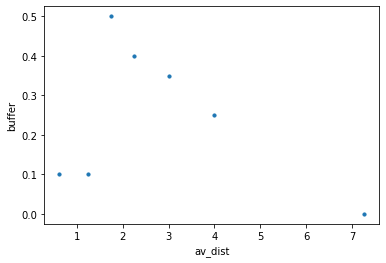

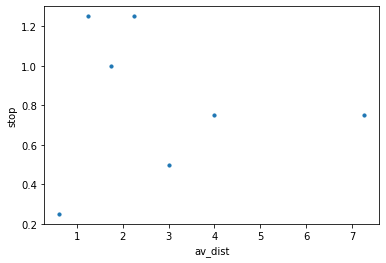

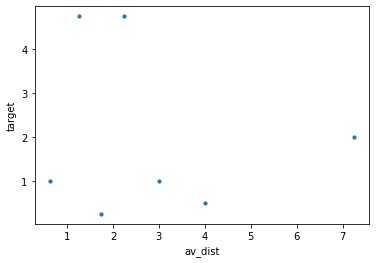

In [17]:
# ALL
summarize_stats('stats_all', distance_points)

# LONGS
[< -- START](#START)


0.25 -> 1.0


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return





1.0 -> 1.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
2179,1.0 -> 1.5,1.0,1.5,0.10,1.25,5.00,4.000,2.599,39.344,61,44.262,31.33,2.064,0.228,7.148
2219,1.0 -> 1.5,1.0,1.5,0.10,1.75,5.00,2.857,2.176,47.541,61,49.180,26.57,2.106,0.258,6.863
1918,1.0 -> 1.5,1.0,1.5,0.00,2.00,4.75,2.375,1.825,45.161,62,53.226,24.65,2.076,0.276,6.802
2178,1.0 -> 1.5,1.0,1.5,0.10,1.25,4.75,3.800,2.527,37.705,61,44.262,29.64,2.006,0.222,6.581
1878,1.0 -> 1.5,1.0,1.5,0.00,1.50,4.75,3.167,2.252,37.097,62,46.774,27.87,1.979,0.231,6.450
1879,1.0 -> 1.5,1.0,1.5,0.00,1.50,5.00,3.333,2.251,41.935,62,46.774,27.83,1.978,0.231,6.436
2177,1.0 -> 1.5,1.0,1.5,0.10,1.25,4.50,3.600,2.507,34.426,61,44.262,29.18,1.991,0.220,6.428
2078,1.0 -> 1.5,1.0,1.5,0.05,2.00,4.75,2.375,1.916,49.123,57,52.632,22.89,2.129,0.279,6.388
2218,1.0 -> 1.5,1.0,1.5,0.10,1.75,4.75,2.714,2.109,45.902,61,49.180,25.00,2.041,0.251,6.270
2199,1.0 -> 1.5,1.0,1.5,0.10,1.50,5.00,3.333,2.367,44.262,61,45.902,27.07,2.008,0.230,6.238





1.5 -> 2.0


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
4964,1.5 -> 2.0,1.5,2.0,0.45,0.25,1.25,5.000,5.000,0.000,33,30.303,27.00,2.174,0.164,4.418
4982,1.5 -> 2.0,1.5,2.0,0.45,0.50,0.75,1.500,1.494,0.000,33,57.576,14.44,2.027,0.292,4.212
4963,1.5 -> 2.0,1.5,2.0,0.45,0.25,1.00,4.000,4.000,0.000,33,33.333,22.00,2.000,0.167,3.667
5140,1.5 -> 2.0,1.5,2.0,0.50,0.50,0.25,0.500,0.496,0.000,28,82.143,6.46,2.282,0.461,2.981
4803,1.5 -> 2.0,1.5,2.0,0.40,0.25,1.00,4.000,3.981,0.000,36,30.556,18.88,1.752,0.131,2.475
4802,1.5 -> 2.0,1.5,2.0,0.40,0.25,0.75,3.000,2.984,0.000,36,36.111,15.88,1.687,0.147,2.335
4962,1.5 -> 2.0,1.5,2.0,0.45,0.25,0.75,3.000,3.000,0.000,33,36.364,15.00,1.714,0.152,2.273
5120,1.5 -> 2.0,1.5,2.0,0.50,0.25,0.25,1.000,0.996,0.000,28,64.286,7.96,1.793,0.284,2.263
4980,1.5 -> 2.0,1.5,2.0,0.45,0.50,0.25,0.500,0.500,0.000,33,78.788,6.00,1.857,0.364,2.182
5022,1.5 -> 2.0,1.5,2.0,0.45,1.00,0.75,0.750,0.750,0.000,33,69.697,7.25,1.725,0.293,2.124





2.0 -> 2.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
6658,2.0 -> 2.5,2.0,2.5,0.40,1.25,4.75,3.800,3.105,30.303,33,54.545,39.39,3.726,0.399,15.719
6657,2.0 -> 2.5,2.0,2.5,0.40,1.25,4.50,3.600,2.990,30.303,33,54.545,37.39,3.588,0.393,14.710
6656,2.0 -> 2.5,2.0,2.5,0.40,1.25,4.25,3.400,2.984,27.273,33,54.545,37.29,3.581,0.393,14.659
6614,2.0 -> 2.5,2.0,2.5,0.40,0.75,3.75,5.000,4.618,6.061,33,42.424,45.67,3.402,0.300,13.681
6655,2.0 -> 2.5,2.0,2.5,0.40,1.25,4.00,3.200,2.860,24.242,33,54.545,35.14,3.432,0.387,13.582
6654,2.0 -> 2.5,2.0,2.5,0.40,1.25,3.75,3.000,2.810,15.152,33,54.545,34.27,3.372,0.384,13.149
6774,2.0 -> 2.5,2.0,2.5,0.45,0.75,3.75,5.000,4.560,10.000,30,43.333,42.36,3.487,0.309,13.092
6659,2.0 -> 2.5,2.0,2.5,0.40,1.25,5.00,4.000,3.093,36.364,33,51.515,35.33,3.287,0.358,12.663
6613,2.0 -> 2.5,2.0,2.5,0.40,0.75,3.50,4.667,4.335,6.061,33,42.424,41.71,3.194,0.291,12.155
6651,2.0 -> 2.5,2.0,2.5,0.40,1.25,3.00,2.400,2.401,9.091,33,57.576,30.35,3.258,0.399,12.111





2.5 -> 3.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
7199,2.5 -> 3.5,2.5,3.5,0.00,2.00,5.00,2.500,2.181,45.161,31,61.290,23.06,3.272,0.435,10.041
7197,2.5 -> 3.5,2.5,3.5,0.00,2.00,4.50,2.250,2.123,41.935,31,61.290,22.17,3.184,0.431,9.545
7198,2.5 -> 3.5,2.5,3.5,0.00,2.00,4.75,2.375,2.118,45.161,31,61.290,22.10,3.177,0.430,9.506
7348,2.5 -> 3.5,2.5,3.5,0.05,2.00,2.25,1.125,1.243,12.903,31,74.194,17.75,3.572,0.534,9.483
7196,2.5 -> 3.5,2.5,3.5,0.00,2.00,4.25,2.125,2.109,32.258,31,61.290,21.96,3.164,0.429,9.429
7508,2.5 -> 3.5,2.5,3.5,0.10,2.00,2.25,1.125,1.135,6.452,31,74.194,17.48,3.264,0.515,8.996
7488,2.5 -> 3.5,2.5,3.5,0.10,1.75,2.25,1.286,1.260,3.226,31,70.968,18.73,3.079,0.479,8.975
7195,2.5 -> 3.5,2.5,3.5,0.00,2.00,4.00,2.000,2.014,32.258,31,61.290,20.52,3.022,0.421,8.634
7353,2.5 -> 3.5,2.5,3.5,0.05,2.00,3.50,1.750,2.003,29.032,31,61.290,20.06,3.171,0.420,8.418
7347,2.5 -> 3.5,2.5,3.5,0.05,2.00,2.00,1.000,1.139,9.677,31,74.194,15.69,3.274,0.515,8.085





3.5 -> 4.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
9042,3.5 -> 4.5,3.5,4.5,0.05,1.25,0.75,0.600,0.600,0.000,12,83.333,4.00,3.000,0.556,2.222
8862,3.5 -> 4.5,3.5,4.5,0.00,1.00,0.75,0.750,0.745,0.000,13,76.923,4.48,2.483,0.459,2.059
8902,3.5 -> 4.5,3.5,4.5,0.00,1.50,0.75,0.500,0.500,0.000,13,84.615,3.50,2.750,0.538,1.885
9142,3.5 -> 4.5,3.5,4.5,0.10,0.50,0.75,1.500,1.485,0.000,10,60.000,4.96,2.228,0.331,1.640
9022,3.5 -> 4.5,3.5,4.5,0.05,1.00,0.75,0.750,0.750,0.000,12,75.000,3.75,2.250,0.417,1.562
9062,3.5 -> 4.5,3.5,4.5,0.05,1.50,0.75,0.500,0.500,0.000,12,83.333,3.00,2.500,0.500,1.500
8922,3.5 -> 4.5,3.5,4.5,0.00,1.75,0.75,0.429,0.430,0.000,13,84.615,2.73,2.365,0.488,1.333
9002,3.5 -> 4.5,3.5,4.5,0.05,0.75,0.75,1.000,0.998,0.000,12,66.667,3.99,1.995,0.332,1.327
9122,3.5 -> 4.5,3.5,4.5,0.10,0.25,0.75,3.000,3.000,0.000,10,40.000,6.00,2.000,0.200,1.200
8882,3.5 -> 4.5,3.5,4.5,0.00,1.25,0.75,0.600,0.600,0.000,13,76.923,3.00,2.000,0.385,1.154





4.5 -> 10


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
12004,4.5 -> 10,4.5,10.0,0.45,0.25,1.25,5.000,4.870,0.0,7,57.143,16.92,6.494,0.483,8.180
10607,4.5 -> 10,4.5,10.0,0.00,0.75,2.00,2.667,2.670,0.0,5,80.000,9.68,10.680,0.725,7.019
12087,4.5 -> 10,4.5,10.0,0.45,1.25,2.00,1.600,1.600,0.0,7,85.714,8.60,9.600,0.768,6.604
10584,4.5 -> 10,4.5,10.0,0.00,0.50,1.25,2.500,2.500,0.0,5,80.000,9.00,10.000,0.720,6.480
12027,4.5 -> 10,4.5,10.0,0.45,0.50,2.00,4.000,3.974,0.0,7,57.143,12.98,5.298,0.464,6.017
12003,4.5 -> 10,4.5,10.0,0.45,0.25,1.00,4.000,3.896,0.0,7,57.143,12.92,5.195,0.461,5.962
10606,4.5 -> 10,4.5,10.0,0.00,0.75,1.75,2.333,2.330,0.0,5,80.000,8.32,9.320,0.714,5.942
12107,4.5 -> 10,4.5,10.0,0.45,1.50,2.00,1.333,1.330,0.0,7,85.714,6.98,7.980,0.750,5.233
11927,4.5 -> 10,4.5,10.0,0.40,1.25,2.00,1.600,1.584,0.0,6,83.333,6.99,7.921,0.728,5.090
11767,4.5 -> 10,4.5,10.0,0.35,1.25,2.00,1.600,1.584,0.0,6,83.333,6.99,7.921,0.728,5.090


,av_dist,distance_key,buffer,stop,target,target_r,win_rate,profit_factor,total_return_r,kelly_adj_return,hit_count
0,-1.00,0.25 -> 1.0,-1.00,-1.00,-1.00,-1.0,-1.000,-1.000,0.00,0.000,0
1,1.25,1.0 -> 1.5,0.10,1.25,5.00,4.0,44.262,2.064,31.33,7.148,61
2,1.75,1.5 -> 2.0,0.45,0.25,1.25,5.0,30.303,2.174,27.00,4.418,33
3,2.25,2.0 -> 2.5,0.40,1.25,4.75,3.8,54.545,3.726,39.39,15.719,33
4,3.00,2.5 -> 3.5,0.00,2.00,5.00,2.5,61.290,3.272,23.06,10.041,31
5,4.00,3.5 -> 4.5,0.05,1.25,0.75,0.6,83.333,3.000,4.00,2.222,12
6,7.25,4.5 -> 10,0.45,0.25,1.25,5.0,57.143,6.494,16.92,8.180,7



SUMMARY OF TOTALS:
kelly_adj_return_sum 47.727999999999994
total_return_r_sum 141.7
hit_count_sum 177



<AxesSubplot:xlabel='av_dist', ylabel='buffer'>

<AxesSubplot:xlabel='av_dist', ylabel='stop'>

<AxesSubplot:xlabel='av_dist', ylabel='target'>

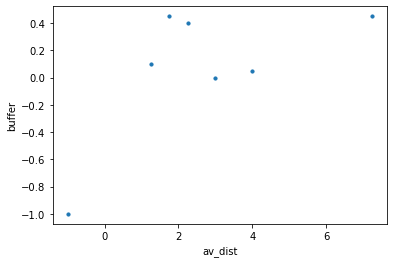

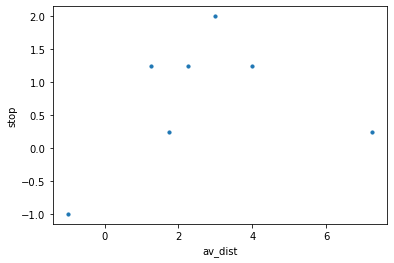

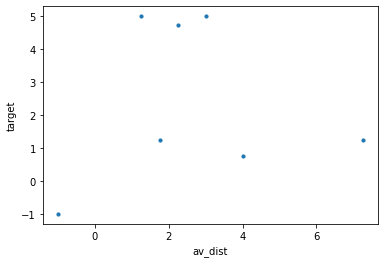

In [18]:
# LONGS
summarize_stats('stats_longs', distance_points)

# SHORTS
[< -- START](#START)


0.25 -> 1.0


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
323,0.25 -> 1.0,0.25,1.0,0.10,0.25,1.00,4.0,3.805,2.885,104,33.654,60.64,1.875,0.162,9.833
163,0.25 -> 1.0,0.25,1.0,0.05,0.25,1.00,4.0,3.697,3.000,100,33.000,55.28,1.821,0.149,8.225
322,0.25 -> 1.0,0.25,1.0,0.10,0.25,0.75,3.0,2.879,2.885,104,36.538,40.68,1.614,0.145,5.896
324,0.25 -> 1.0,0.25,1.0,0.10,0.25,1.25,5.0,4.430,4.808,104,27.885,49.28,1.654,0.116,5.720
183,0.25 -> 1.0,0.25,1.0,0.05,0.50,1.00,2.0,1.857,5.000,100,46.000,31.40,1.582,0.169,5.315
162,0.25 -> 1.0,0.25,1.0,0.05,0.25,0.75,3.0,2.856,2.000,100,36.000,39.00,1.606,0.136,5.300
189,0.25 -> 1.0,0.25,1.0,0.05,0.50,2.50,5.0,3.250,16.000,100,33.000,40.22,1.601,0.124,4.981
164,0.25 -> 1.0,0.25,1.0,0.05,0.25,1.25,5.0,4.418,4.000,100,27.000,46.48,1.634,0.105,4.869
321,0.25 -> 1.0,0.25,1.0,0.10,0.25,0.50,2.0,1.966,1.923,104,44.231,30.60,1.525,0.159,4.853
343,0.25 -> 1.0,0.25,1.0,0.10,0.50,1.00,2.0,1.962,3.846,104,44.231,29.84,1.522,0.158,4.716





1.0 -> 1.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
2972,1.0 -> 1.5,1.0,1.5,0.35,1.25,3.25,2.600,2.240,13.636,44,45.455,19.89,1.866,0.211,4.197
2932,1.0 -> 1.5,1.0,1.5,0.35,0.75,3.25,4.333,3.668,9.091,44,34.091,25.48,1.897,0.161,4.108
2872,1.0 -> 1.5,1.0,1.5,0.30,2.00,3.25,1.625,1.667,23.810,42,54.762,14.50,1.931,0.276,4.007
2992,1.0 -> 1.5,1.0,1.5,0.35,1.50,3.25,2.167,1.827,15.909,44,50.000,17.26,1.827,0.226,3.907
2873,1.0 -> 1.5,1.0,1.5,0.30,2.00,3.50,1.750,1.762,23.810,42,52.381,14.09,1.850,0.254,3.572
3032,1.0 -> 1.5,1.0,1.5,0.35,2.00,3.25,1.625,1.526,20.455,44,54.545,14.39,1.831,0.248,3.563
3012,1.0 -> 1.5,1.0,1.5,0.35,1.75,3.25,1.857,1.637,18.182,44,52.273,15.27,1.793,0.231,3.530
2971,1.0 -> 1.5,1.0,1.5,0.35,1.25,3.00,2.400,2.072,13.636,44,45.455,16.69,1.727,0.191,3.193
2852,1.0 -> 1.5,1.0,1.5,0.30,1.75,3.25,1.857,1.787,19.048,42,50.000,14.39,1.787,0.220,3.169
2931,1.0 -> 1.5,1.0,1.5,0.35,0.75,3.00,4.000,3.398,9.091,44,34.091,21.52,1.758,0.147,3.163





1.5 -> 2.0


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
3755,1.5 -> 2.0,1.5,2.0,0.05,1.00,4.00,4.000,3.267,11.364,44,36.364,23.99,1.867,0.169,4.051
3754,1.5 -> 2.0,1.5,2.0,0.05,1.00,3.75,3.750,3.078,11.364,44,36.364,20.99,1.759,0.157,3.292
3815,1.5 -> 2.0,1.5,2.0,0.05,1.75,4.00,2.286,1.985,31.818,44,47.727,15.34,1.812,0.214,3.281
3756,1.5 -> 2.0,1.5,2.0,0.05,1.00,4.25,4.250,3.398,11.364,44,34.091,21.73,1.758,0.147,3.193
3795,1.5 -> 2.0,1.5,2.0,0.05,1.50,4.00,2.667,2.254,25.000,44,43.182,15.64,1.713,0.180,2.811
3819,1.5 -> 2.0,1.5,2.0,0.05,1.75,5.00,2.857,2.078,36.364,44,45.455,14.56,1.732,0.192,2.797
3814,1.5 -> 2.0,1.5,2.0,0.05,1.75,3.75,2.143,1.872,31.818,44,47.727,13.39,1.709,0.198,2.651
3775,1.5 -> 2.0,1.5,2.0,0.05,1.25,4.00,3.200,2.647,18.182,44,38.636,16.72,1.667,0.155,2.585
3753,1.5 -> 2.0,1.5,2.0,0.05,1.00,3.50,3.500,2.888,11.364,44,36.364,17.99,1.650,0.143,2.577
3816,1.5 -> 2.0,1.5,2.0,0.05,1.75,4.25,2.429,2.028,31.818,44,45.455,13.73,1.690,0.186,2.549





2.0 -> 2.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
6664,2.0 -> 2.5,2.0,2.5,0.40,1.50,1.25,0.833,0.780,5.000,20,85.000,10.30,4.422,0.658,6.775
6684,2.0 -> 2.5,2.0,2.5,0.40,1.75,1.25,0.714,0.669,5.000,20,85.000,8.38,3.793,0.626,5.245
6983,2.0 -> 2.5,2.0,2.5,0.50,1.50,1.00,0.667,0.670,0.000,16,87.500,7.38,4.690,0.688,5.081
6704,2.0 -> 2.5,2.0,2.5,0.40,2.00,1.25,0.625,0.719,10.000,20,85.000,7.50,4.074,0.641,4.810
6663,2.0 -> 2.5,2.0,2.5,0.40,1.50,1.00,0.667,0.630,5.000,20,85.000,7.74,3.571,0.612,4.737
6504,2.0 -> 2.5,2.0,2.5,0.35,1.50,1.25,0.833,0.782,5.000,20,80.000,8.51,3.127,0.544,4.631
6464,2.0 -> 2.5,2.0,2.5,0.35,1.00,1.25,1.250,1.165,5.000,20,70.000,10.33,2.719,0.443,4.571
6624,2.0 -> 2.5,2.0,2.5,0.40,1.00,1.25,1.250,1.164,5.000,20,70.000,10.29,2.715,0.442,4.550
6465,2.0 -> 2.5,2.0,2.5,0.35,1.00,1.50,1.500,1.390,5.000,20,65.000,11.08,2.581,0.398,4.411
6463,2.0 -> 2.5,2.0,2.5,0.35,1.00,1.00,1.000,0.939,5.000,20,75.000,9.09,2.818,0.484,4.398





2.5 -> 3.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
8183,2.5 -> 3.5,2.5,3.5,0.35,0.50,1.00,2.000,1.945,3.448,29,58.621,21.24,2.755,0.373,7.932
8343,2.5 -> 3.5,2.5,3.5,0.40,0.50,1.00,2.000,1.936,3.448,29,58.621,21.12,2.743,0.372,7.866
8363,2.5 -> 3.5,2.5,3.5,0.40,0.75,1.00,1.333,1.302,3.448,29,68.966,17.08,2.894,0.451,7.708
7564,2.5 -> 3.5,2.5,3.5,0.15,0.75,1.25,1.667,1.670,0.000,29,62.069,19.06,2.733,0.394,7.501
8184,2.5 -> 3.5,2.5,3.5,0.35,0.50,1.25,2.500,2.385,3.448,29,51.724,22.12,2.556,0.315,6.964
7597,2.5 -> 3.5,2.5,3.5,0.15,1.00,4.50,4.500,3.682,17.241,29,41.379,25.99,2.599,0.255,6.617
8347,2.5 -> 3.5,2.5,3.5,0.40,0.50,2.00,4.000,3.567,6.897,29,41.379,26.02,2.518,0.249,6.491
7565,2.5 -> 3.5,2.5,3.5,0.15,0.75,1.50,2.000,1.976,3.448,29,55.172,18.61,2.432,0.325,6.045
8503,2.5 -> 3.5,2.5,3.5,0.45,0.50,1.00,2.000,1.938,3.226,31,54.839,19.06,2.354,0.315,6.011
7596,2.5 -> 3.5,2.5,3.5,0.15,1.00,4.25,4.250,3.508,17.241,29,41.379,23.99,2.476,0.247,5.918





3.5 -> 4.5


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
10302,3.5 -> 4.5,3.5,4.5,0.45,1.00,0.75,0.750,0.750,0.000,8,87.500,4.25,5.250,0.708,3.010
9842,3.5 -> 4.5,3.5,4.5,0.30,1.25,0.75,0.600,0.600,0.000,13,84.615,4.60,3.300,0.590,2.713
9482,3.5 -> 4.5,3.5,4.5,0.20,0.75,0.75,1.000,1.080,6.250,16,68.750,6.37,2.376,0.398,2.536
9843,3.5 -> 4.5,3.5,4.5,0.30,1.25,1.00,0.800,0.800,0.000,13,76.923,5.00,2.667,0.481,2.404
10322,3.5 -> 4.5,3.5,4.5,0.45,1.25,0.75,0.600,0.600,0.000,8,87.500,3.20,4.200,0.667,2.133
10142,3.5 -> 4.5,3.5,4.5,0.40,1.00,0.75,0.750,0.750,0.000,10,80.000,4.00,3.000,0.533,2.133
10482,3.5 -> 4.5,3.5,4.5,0.50,1.25,0.75,0.600,0.600,0.000,8,87.500,3.20,4.200,0.667,2.133
9822,3.5 -> 4.5,3.5,4.5,0.30,1.00,0.75,0.750,0.750,0.000,13,76.923,4.50,2.500,0.462,2.077
10303,3.5 -> 4.5,3.5,4.5,0.45,1.00,1.00,1.000,1.000,0.000,8,75.000,4.00,3.000,0.500,2.000
10306,3.5 -> 4.5,3.5,4.5,0.45,1.00,1.75,1.750,1.612,12.500,8,62.500,5.06,2.687,0.392,1.985





4.5 -> 10


,distance_key,distance_min,distance_max,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
10722,4.5 -> 10,4.5,10.0,0.05,0.25,0.75,3.000,2.067,25.0,4,75.0,5.20,6.200,0.629,3.271
10561,4.5 -> 10,4.5,10.0,0.00,0.25,0.50,2.000,2.000,0.0,4,75.0,5.00,6.000,0.625,3.125
10588,4.5 -> 10,4.5,10.0,0.00,0.50,2.25,4.500,4.455,0.0,4,50.0,6.98,4.455,0.388,2.707
10587,4.5 -> 10,4.5,10.0,0.00,0.50,2.00,4.000,3.960,0.0,4,50.0,5.98,3.960,0.374,2.235
10582,4.5 -> 10,4.5,10.0,0.00,0.50,0.75,1.500,1.471,0.0,4,75.0,3.48,4.412,0.580,2.018
11040,4.5 -> 10,4.5,10.0,0.15,0.25,0.25,1.000,5.000,25.0,4,75.0,2.80,15.000,0.700,1.960
10586,4.5 -> 10,4.5,10.0,0.00,0.50,1.75,3.500,3.465,0.0,4,50.0,4.98,3.465,0.356,1.771
11200,4.5 -> 10,4.5,10.0,0.20,0.25,0.25,1.000,2.500,25.0,4,75.0,2.60,7.500,0.650,1.690
10648,4.5 -> 10,4.5,10.0,0.00,1.25,2.25,1.800,1.300,25.0,4,75.0,2.90,3.900,0.558,1.617
10647,4.5 -> 10,4.5,10.0,0.00,1.25,2.00,1.600,1.167,25.0,4,75.0,2.50,3.500,0.536,1.339


,av_dist,distance_key,buffer,stop,target,target_r,win_rate,profit_factor,total_return_r,kelly_adj_return,hit_count
0,0.625,0.25 -> 1.0,0.10,0.25,1.00,4.000,33.654,1.875,60.64,9.833,104
1,1.250,1.0 -> 1.5,0.35,1.25,3.25,2.600,45.455,1.866,19.89,4.197,44
2,1.750,1.5 -> 2.0,0.05,1.00,4.00,4.000,36.364,1.867,23.99,4.051,44
3,2.250,2.0 -> 2.5,0.40,1.50,1.25,0.833,85.000,4.422,10.30,6.775,20
4,3.000,2.5 -> 3.5,0.35,0.50,1.00,2.000,58.621,2.755,21.24,7.932,29
5,4.000,3.5 -> 4.5,0.45,1.00,0.75,0.750,87.500,5.250,4.25,3.010,8
6,7.250,4.5 -> 10,0.05,0.25,0.75,3.000,75.000,6.200,5.20,3.271,4



SUMMARY OF TOTALS:
kelly_adj_return_sum 39.069
total_return_r_sum 145.51
hit_count_sum 253



<AxesSubplot:xlabel='av_dist', ylabel='buffer'>

<AxesSubplot:xlabel='av_dist', ylabel='stop'>

<AxesSubplot:xlabel='av_dist', ylabel='target'>

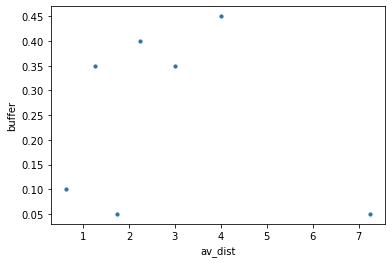

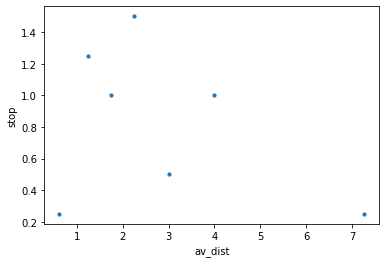

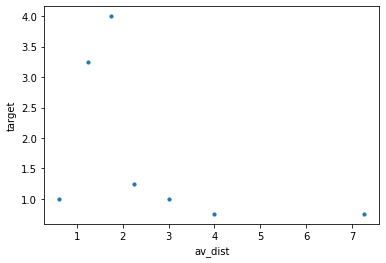

In [19]:
# SHORTS
summarize_stats('stats_shorts', distance_points)
# summarize_stats('stats_shorts', distance_points, sort_by='profit_factor')